# MOWNIT
## Lab 7
Jakub Karbowski

In [1]:
using Plots
using Interact
using LinearAlgebra: Diagonal, inv, opnorm

WebIO._IJuliaInit()

In [2]:
norm(x, y) = maximum(@. abs(x - y) )

function spectral(A::Matrix{T}) where T
    Dinv = inv(Diagonal(A))
    LU = T[i!=j ? A[i, j] : 0 for i=1:size(A)[1], j=1:size(A)[2]]
    opnorm(Dinv * LU, 2)
end

spectral (generic function with 1 method)

In [3]:
termcrit_change(eps::T) where T =
    (_, _, x0::Vector{T}, x1::Vector{T}) -> norm(x1, x0) < eps
termcrit_resid(eps::T) where T =
    (A::Matrix{T}, b::Vector{T}, _, x::Vector{T}) -> norm(A * x, b) < eps

termcrit_resid (generic function with 1 method)

In [4]:
function jacobi(A::Matrix{T}, b::Vector{T}, x0::Vector{T}, maxiter, termcrit) where T
    n = length(b)

    Dinv = inv(Diagonal(A))
    LU = T[i!=j ? A[i, j] : 0 for i=1:n, j=1:n]

    x0, x1 = T[Inf for i=1:n], x0
    
    i = 0
    
    while i < maxiter && !termcrit(A, b, x0, x1)
        x0, x1 = x1, Dinv * (b - LU * x1)
        i += 1
    end
    
    x1, i
end

jacobi (generic function with 1 method)

In [5]:
# b) k=8 m=3
makemat(::Type{T}, n) where T = T[
    i==j ? 8 : 1 / (abs(i - j) + 3)
    for i = 1:n, j = 1:n
]

makemat (generic function with 1 method)

# Zadanie 1

In [6]:
function experiment(n, x0::Vector{T}, eps::T, termcrit) where T
    A = makemat(T, n)
    x = rand(T[1, -1], n)
    b = A * x
    
    xres, iters = jacobi(A, b, x0, 500, termcrit(eps))
    
    err = norm(xres, x)
    
    err, iters
end

experiment (generic function with 1 method)

In [7]:
function zad1()
    ns = 100:100:1000
    
    data = [
        begin
            res = experiment(n, ones(n), eps, termcrit)
            t = sum([@elapsed experiment(n, ones(n), eps, termcrit) for i=1:10])/10
            (n, res..., eps, termcrit, t)
        end
        
        for termcrit = [termcrit_change, termcrit_resid],
            n = ns,
            eps = 10. .^ (-7:-1:-9)
    ]
end

data = zad1()
;

In [8]:
data[1]

(100, 2.744841287594113e-8, 38, 1.0e-7, termcrit_change, 0.0006395626000000002)

In [9]:
function plotstuff(col, nmax)
    ns = 100:100:100nmax
    plot(
        xlabel="n",
    )
    plot!(
        ns,
        getindex.(data[2, 1:nmax, 3], col),
        label="$(data[2, 1, 3][5]), eps = $(data[2, 1, 3][4])",
    )
    plot!(
        ns,
        getindex.(data[2, 1:nmax, 2], col),
        label="$(data[2, 1, 2][5]), eps = $(data[2, 1, 2][4])",
    )
    plot!(
        ns,
        getindex.(data[2, 1:nmax, 1], col),
        label="$(data[2, 1, 1][5]), eps = $(data[2, 1, 1][4])",
    )
    plot!(
        ns,
        getindex.(data[1, 1:nmax, 3], col),
        label="$(data[1, 1, 3][5]), eps = $(data[1, 1, 3][4])",
    )
    plot!(
        ns,
        getindex.(data[1, 1:nmax, 2], col),
        label="$(data[1, 1, 2][5]), eps = $(data[1, 1, 2][4])",
    )
    plot!(
        ns,
        getindex.(data[1, 1:nmax, 1], col),
        label="$(data[1, 1, 1][5]), eps = $(data[1, 1, 1][4])",
        legend=:topleft,
    )
end

plotstuff (generic function with 1 method)

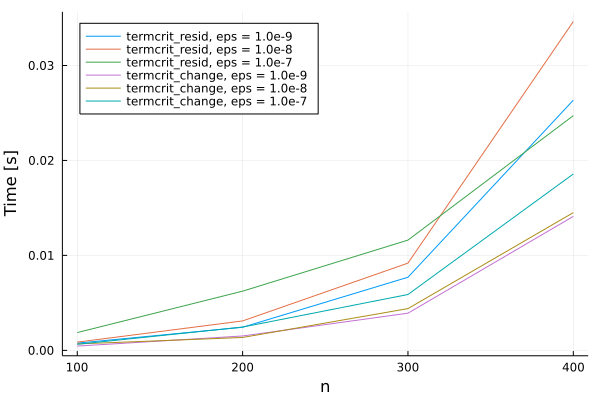

In [10]:
plotstuff(6, 4)
plot!(ylabel="Time [s]")

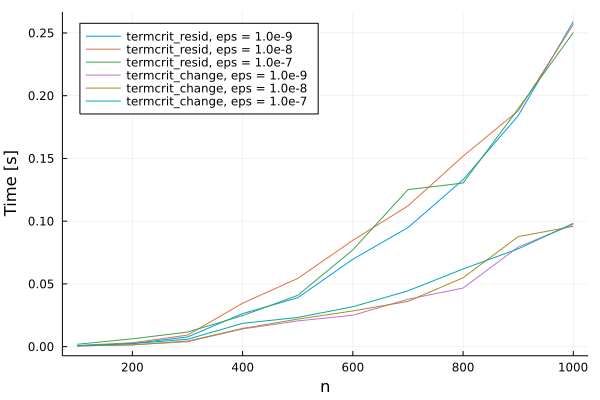

In [11]:
plotstuff(6, 10)
plot!(ylabel="Time [s]")

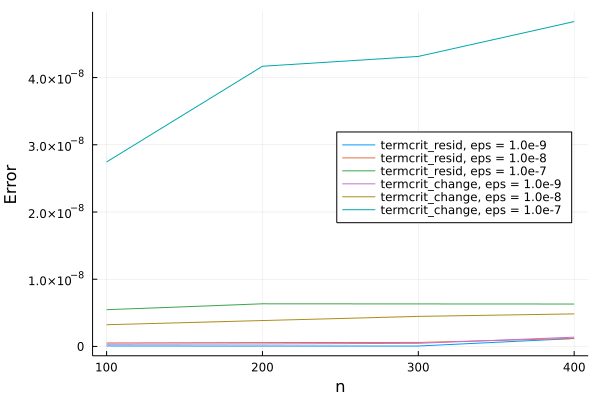

In [12]:
plotstuff(2, 4)
plot!(ylabel="Error", legend=:right)

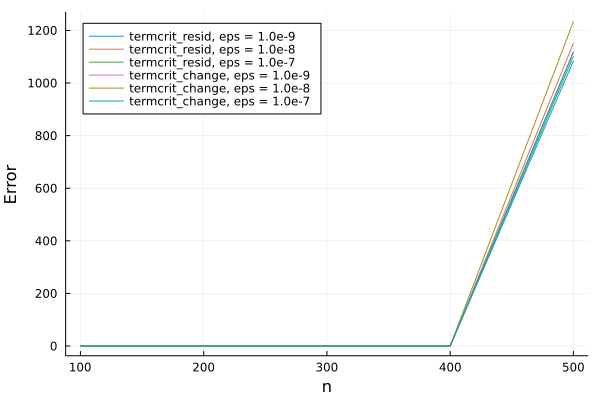

In [13]:
plotstuff(2, 5)
plot!(ylabel="Error")

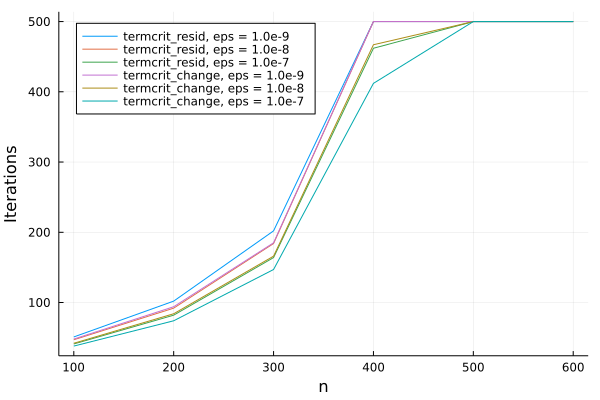

In [14]:
plotstuff(3, 6)
plot!(ylabel="Iterations", legend=:topleft)

# Zadanie 2

10×2 Matrix{Float64}:
  100.0  0.63131
  200.0  0.792746
  300.0  0.889834
  400.0  0.959529
  500.0  1.01395
  600.0  1.0586
  700.0  1.09646
  800.0  1.12933
  900.0  1.15838
 1000.0  1.1844

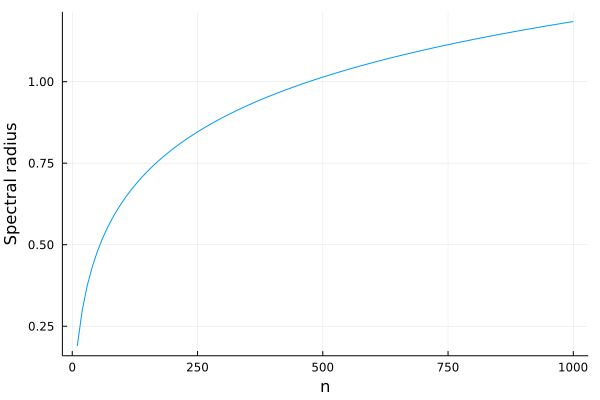

In [15]:
function zad2()
    ns = 10:10:1000
    ys = @. spectral(makemat(Float64, ns))
    display([ns ys][10:10:end, :])
    plot(
        ns,
        ys,
        label=false,
        xlabel="n",
        ylabel="Spectral radius",
    )
end

zad2()